## 一、画图练习

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import xlrd

In [2]:
#导入数据
csvpath = ("D:/myPythonFiles/2020-2021第一学期/Python数据运算与数据可视化/2_4 22019207047/WorldIndex.csv")
frame = pd.read_csv(csvpath)
frame.head()

,Country,Continent,Life_expectancy,GDP_per_capita,Population
0,Algeria,Africa,75.042537,4132.760292,39871528.0
1,Angola,Africa,52.666098,3695.793748,27859305.0
2,Benin,Africa,59.720707,783.947091,10575952.0
3,Botswana,Africa,64.487415,6532.060501,2209197.0
4,Burundi,Africa,57.107049,303.681022,10199270.0


In [3]:
#添加新一列填入Continent名称
frame.loc[frame['Continent']=='Africa', 'class'] = "0"
frame.loc[frame['Continent']=='Asia', 'class'] = "1"
frame.loc[frame['Continent']=='Europe', 'class'] = "2"
frame.loc[frame['Continent']=='North America', 'class'] = "3"
frame.loc[frame['Continent']=='Oceania', 'class'] = "4"
frame.loc[frame['Continent']=='South America', 'class'] = "5"

frame

,Country,Continent,Life_expectancy,GDP_per_capita,Population,class
0,Algeria,Africa,75.042537,4132.760292,39871528.0,0
1,Angola,Africa,52.666098,3695.793748,27859305.0,0
2,Benin,Africa,59.720707,783.947091,10575952.0,0
3,Botswana,Africa,64.487415,6532.060501,2209197.0,0
4,Burundi,Africa,57.107049,303.681022,10199270.0,0
...,...,...,...,...,...,...
172,Paraguay,South America,73.025634,4109.367724,6639119.0,5
173,Peru,South America,74.780732,6030.343259,31376671.0,5
174,Suriname,South America,71.294171,8818.982566,553208.0,5
175,Uruguay,South America,77.138220,15524.842470,3431552.0,5


In [4]:
#删除缺失值
data=frame.dropna()

#### 1、绘制人均寿命数据的直方图

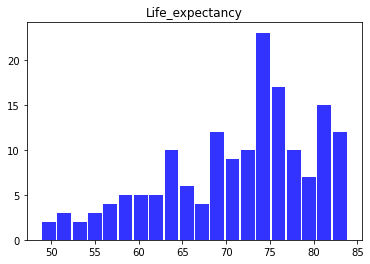

In [5]:
fig = plt.figure()
x = data['Life_expectancy']
ax = fig.add_subplot(111)
numBins = 20
ax.hist(x,numBins,color='blue',alpha=0.8,rwidth=0.9)
plt.title('Life_expectancy')
plt.show()

#### 2、人均GDP直方图

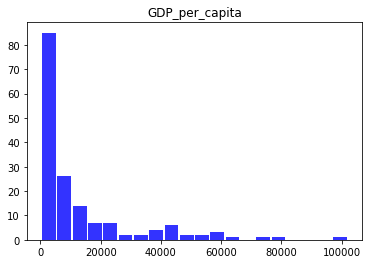

In [6]:
fig = plt.figure()
x = data['GDP_per_capita']
ax = fig.add_subplot(111)
numBins = 20
ax.hist(x,numBins,color='blue',alpha=0.8,rwidth=0.9)
plt.title('GDP_per_capita')
plt.show()

#### 3、人均寿命箱线图

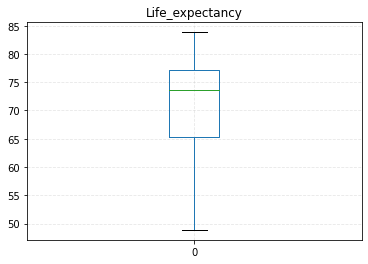

In [7]:
Life_array = np.array(data['Life_expectancy'])
 
df = pd.DataFrame(Life_array)
df.plot.box(title="Life_expectancy")
plt.grid(linestyle="--", alpha=0.3)
plt.show()

#### 4、每个大洲的国家个数条形图

In [8]:
#根据Continent分组求国家数量
group_by_Continent = data.groupby(['Continent'])
Country_num = group_by_Continent.size()

In [9]:
#将大洲名称、国家数量转换为array
Country_values = Country_num.values
array_Continent=[]
for i in Country_num.index:
    array_Continent.append(i)
print(Country_values)
print(array_Continent)

[48 36 41 19  9 11]
['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']


#### 5、绘制每个大洲国家个数条形图

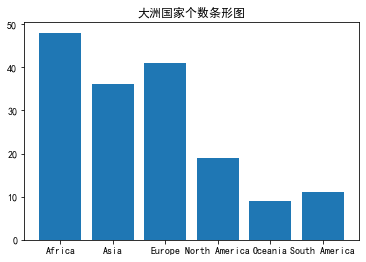

In [10]:
# 这两行代码解决 plt 中文显示的问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.bar(array_Continent, Country_values)
plt.title('大洲国家个数条形图')

plt.show()

#### 6、绘制各大洲国家数量占比的饼图

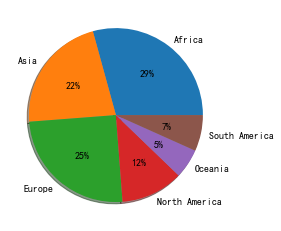

In [11]:
labels = Country_num.index
fraces = Country_values
plt.axes(aspect=1)
plt.pie(x=fraces,labels=labels,autopct='%.0f%%',shadow=True)
plt.show()

#### 7、绘制人均寿命和人均GDP的关系（散点）

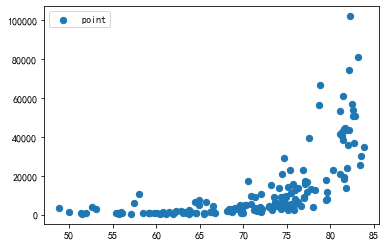

In [12]:
x = data['Life_expectancy']
y = data['GDP_per_capita']

plt.scatter(x, y, marker = 'o',s = 40 ,label = 'point')
plt.legend(loc = 'best')    # 设置 图例所在的位置 使用推荐位置

plt.show()  

#### 8、人均GDP与人均寿命的气泡图

In [13]:
#根据Continent分组求国家数量
group_by_Continent = data.groupby(['Continent'])
Country_num = group_by_Continent.size()
#将大洲名称、国家数量转换为array
Country_values = Country_num.values
array_Continent=[]
for i in Country_num.index:
    array_Continent.append(i)
print(array_Continent)

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']


In [14]:
# 分别计算GDP与Life)expectancy最小与最大值

In [15]:
print(data['GDP_per_capita'].min())
print(data['GDP_per_capita'].max())

303.6810223
101909.8223


In [16]:
print(data['Life_expectancy'].min())
print(data['Life_expectancy'].max())

48.87395122
83.84365854


In [17]:
print(data['Population'].max())

1371220000.0


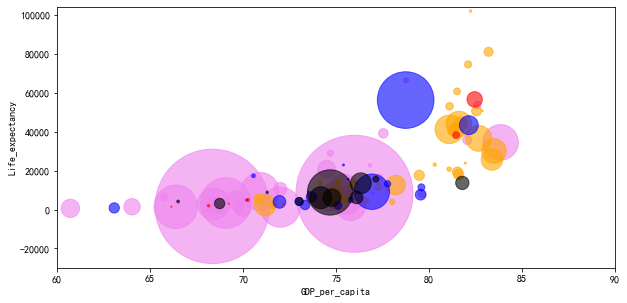

In [18]:
'''下面两行决定中文字体的显示'''
plt.figure(figsize = [10, 4.8])
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

colornum=data['Life_expectancy']  #横坐标
wordsnum=data['GDP_per_capita']   #纵坐标
Fre=data['Population']/100000    #气泡大小

Type=data['class']   #决定气泡颜色的类序号
Type=list(map(int,Type))

'''绘图'''
color=['white','violet','orange','blue','red','black']   #plt.scatter()函数中依据此设定颜色
size=Fre  #依据Fre决定气泡的大小
plt.scatter(colornum,wordsnum,color=[color[i] for i in Type],s=size,alpha=0.6)
plt.xlim(60,90)
plt.ylim(-30000,104000)
plt.xlabel("GDP_per_capita")  #设置横坐标标题
plt.ylabel("Life_expectancy")  #设置纵坐标标题

plt.show()

## 二、Scipy解方程

#### 1、求解f(x)=2*sin(x)-x+1

In [19]:
from scipy.optimize import fsolve
from math import sin
 
def f(x):
    return np.sin(x)*2-x+1
 
result = fsolve(f, [2])
 
print(result)
print(f(result))

[2.38006127]
[-2.22044605e-16]


#### 2、求解线性方程组{3X1+2X2=3;X1-2X2=5}

In [20]:
def f2(x):
    return np.array([3*x[0]+2*x[1]-3,x[0]-2*x[1]-5])

sol2_fsolve = fsolve(f2,[0,0])

a = np.array([[3,2],[1,-2]])
b = np.array([3,5])
x = np.linalg.solve(a,b)

print(x)

[ 2.  -1.5]
